This is the notebook for getting the testable pair numbers (1st step of Voronoi test) and visualizing the graph extraction results. 

The samples used in this notebook is the 80 traced in the environmental conditioning experiments (5/14/22)

In [79]:
import graph_create, figure_plot, figure_save

import os
import shutil

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from statannot import add_stat_annotation
from shapely.geometry import Polygon 

In [12]:
def hydathode_num(G):
    hydatode_count = 0
    single_count = 0 
    for n in G:  
        if G.nodes[n]['type'] != 'vein':
            hydatode_count += 1
            if G.nodes[n]['type'] == 'single_dot':
                single_count += 1
    return hydatode_count, single_count


In [13]:
def area_sum(G):
    faces = G.graph['faces_passed']
    area_tot = 0
    for face in faces:
        face_poly = Polygon(face)
        area_tot += face_poly.area
        blade_area = Polygon(G.graph['boundary']).area

    return blade_area, area_tot

In [14]:
def get_directory(condition):
    dot_folder = f'environmental/dot_images/{condition}_dots'
    vein_folder = f'environmental/vein_graphs/{condition}_txt'
    samples_csv =  f'environmental/{condition}_samples.csv'
    samples = pd.read_csv(samples_csv, delimiter=',', header = None ).values.tolist()
    samples = [item[0] for item in samples]

    return dot_folder, vein_folder, samples

In [15]:
def first_plot(condition):

    'plot a round of every sample we have'
    
    dot_folder, vein_folder, samples = get_directory(condition)
    for sample in samples:
        print('----------------------------------')
        print('we are plotting:', sample)
        print()
        G = graph_create.graph_creation(sample, dot_folder= dot_folder, vein_folder= vein_folder)
        figure_plot.quick_plot(G)

In [50]:
def save_graph(condition):

    'save a round of every sample we have'
    
    dot_folder, vein_folder, samples = get_directory(condition)
    print(dot_folder)
    print(vein_folder)

    for sample in samples:
        print('----------------------------------')
        print('we are plotting:', sample)
        print()
        G = graph_create.graph_creation(sample, dot_folder= dot_folder, vein_folder= vein_folder)

        deposit_folder = f'environmental/output_graphs/{sample}'
        
        if os.path.exists(deposit_folder):
            shutil.rmtree(deposit_folder)
        os.makedirs(deposit_folder)

        figure_save.quick_plot(G, deposit_folder)

In [27]:
def get_info(condition):
    
    'output a df containing hydathode count and testable area info'

    dot_folder, vein_folder, samples = get_directory(condition)

    info_arr = np.zeros((20, 5))

    columns = ['hydatode_count','single_count', 'blade_area', 'area_tot', 'area_ratio']

    for i, sample in enumerate(samples):
        G = graph_create.graph_creation(sample, dot_folder= dot_folder, vein_folder= vein_folder)
        hydatode_count, single_count = hydathode_num(G)
        blade_area, area_tot = area_sum(G)
        info_arr[i][0] = hydatode_count
        info_arr[i][1] = single_count
        info_arr[i][2] = blade_area
        info_arr[i][3] = area_tot
        info_arr[i][4] = area_tot/blade_area
    info_df = pd.DataFrame(info_arr, index  = samples, columns = columns)

    return info_df 

In [29]:
# first_plot(condition = 'control')
# first_plot(condition = 'shade')
# first_plot(condition = 'natural')
# first_plot(condition = 'heat')

In [30]:
control_info = get_info(condition ='control')
natural_info = get_info(condition ='natural')
shade_info = get_info(condition ='shade')
heat_info = get_info(condition = 'heat')

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Step3: read vein graph...

- Step4: merge graphs...

- Step5: find testable faces...

Graph creation completed.

Creating graph from vein and dot tracing images.

- Step1: reading files...

- Step2: create dot graph...

- Ste

In [31]:
control_sum = control_info.describe()
natural_sum = natural_info.describe()
shade_sum = shade_info.describe()
heat_sum = heat_info.describe()

In [32]:
control_info

,hydatode_count,single_count,blade_area,area_tot,area_ratio
C1-1,66.0,55.0,13424149.0,11530853.5,0.858963
C1-2,50.0,36.0,28502378.0,18968430.0,0.665503
C1-3,61.0,41.0,32827780.0,22252887.5,0.677868
C1-4,48.0,41.0,42181475.5,32888907.5,0.779700
C1-5,49.0,36.0,35010583.0,23612533.5,0.674440
C2-1,73.0,67.0,4795479.5,4079795.5,0.850759
C2-2,68.0,60.0,23828966.5,19295509.0,0.809750
C2-3,57.0,46.0,33682002.5,28405425.0,0.843341
C2-5,56.0,50.0,42059751.0,34693011.0,0.824851
C3-1,55.0,49.0,3496934.0,3070465.5,0.878045


In [33]:
natural_info

,hydatode_count,single_count,blade_area,area_tot,area_ratio
N1-1,50.0,19.0,9020958.0,3044042.0,0.337441
N1-2,68.0,48.0,12524530.5,8020172.5,0.640357
N1-3,84.0,27.0,35275608.5,8796851.5,0.249375
N1-4,54.0,41.0,34655456.5,25540581.0,0.736986
N1-5,51.0,49.0,46674966.0,42961758.0,0.920445
N1-6,64.0,44.0,50057407.0,30956120.0,0.618412
N2-2,45.0,38.0,12361591.0,8612232.0,0.696693
N2-3,54.0,45.0,25718478.5,22159402.5,0.861614
N3-2,68.0,37.0,11656717.5,5259282.5,0.451180
N3-3,49.0,39.0,23617877.0,16586101.5,0.702269


In [34]:
heat_info

,hydatode_count,single_count,blade_area,area_tot,area_ratio
H1-1,63.0,10.0,15988676.0,3247859.0,0.203135
H1-2,60.0,15.0,19765732.5,5760296.5,0.291428
H1-4,54.0,23.0,23056969.5,10885702.5,0.472122
H2-2,55.0,28.0,9644957.0,6120820.0,0.634614
H2-4,49.0,32.0,12782175.5,7806303.0,0.610718
H3-1,53.0,16.0,6662276.0,2374370.5,0.356390
H3-2,55.0,32.0,10707644.5,5736182.0,0.535709
H3-3,39.0,33.0,16855145.5,12444387.0,0.738314
H3-4,45.0,34.0,16241907.5,13481567.0,0.830048
H3-5,43.0,32.0,20240446.5,15196059.0,0.750777


In [35]:
shade_info

,hydatode_count,single_count,blade_area,area_tot,area_ratio
S1-1,74.0,45.0,10351285.5,5987330.0,0.578414
S1-2,77.0,58.0,29416372.5,20892286.5,0.710226
S1-3,55.0,38.0,42163129.5,32077327.0,0.760791
S1-5,60.0,47.0,51837611.0,34511103.0,0.665754
S2-2,81.0,54.0,24265568.0,14856049.0,0.612228
S2-4,62.0,45.0,46392944.5,33707607.0,0.726568
S2-5,63.0,59.0,62408839.5,55688165.5,0.892312
S2-6,51.0,41.0,49669281.5,39031334.0,0.785824
S3-2,48.0,46.0,25687152.5,20214000.5,0.786930
S3-4,43.0,33.0,39324917.0,27219192.5,0.692161


In [36]:
summary = np.zeros((4,5))

In [37]:
summary[0] = control_sum.iloc[1]
summary[1] = natural_sum.iloc[1]
summary[2] = shade_sum.iloc[1]
summary[3] = heat_sum.iloc[1]

In [38]:
summary_df = pd.DataFrame(summary, columns = control_sum.columns, index = ['control', 'natural', 'shade', 'heat'])

In [39]:
summary_df

,hydatode_count,single_count,blade_area,area_tot,area_ratio
control,57.45,47.55,2.613466e+07,2.029247e+07,0.781427
natural,57.30,37.00,2.394117e+07,1.549694e+07,0.618324
shade,55.50,41.10,3.217865e+07,2.304947e+07,0.694043
heat,54.10,26.80,1.360832e+07,7.602600e+06,0.523353


In [36]:
# this is to save a csv for the new names we gave each condition for people to understand. 

df_to_print = summary_df[['hydatode_count','single_count','area_ratio']]
df_to_print.index = ['high light', 'natural', 'shade', 'heat']
df_to_print['area_ratio'] = df_to_print['area_ratio']*100
df_to_print = df_to_print.rename(columns={'hydatode_count': 'total hydathode count', 'single_count': 'testable hydathode count', 'area_ratio': 'testable area percentage(%)'})
df_to_print = df_to_print.round(2)
df_to_print.to_csv('hydathode_num.csv')

<ipython-input-36-077301b4cf44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_to_print['area_ratio'] = df_to_print['area_ratio']*100


In [41]:
control_info['condition'] = 'control'
shade_info['condition'] = 'shade'
heat_info['condition'] = 'heat'
natural_info['condition'] = 'natural'

In [42]:
info_df = pd.concat([control_info,shade_info,heat_info,natural_info])
info_df.reset_index(level=0, inplace=True)

In [43]:
info_df.head()

,index,hydatode_count,single_count,blade_area,area_tot,area_ratio,condition
0,C1-1,66.0,55.0,13424149.0,11530853.5,0.858963,control
1,C1-2,50.0,36.0,28502378.0,18968430.0,0.665503,control
2,C1-3,61.0,41.0,32827780.0,22252887.5,0.677868,control
3,C1-4,48.0,41.0,42181475.5,32888907.5,0.779700,control
4,C1-5,49.0,36.0,35010583.0,23612533.5,0.674440,control


Very similar total number of hydathodes:

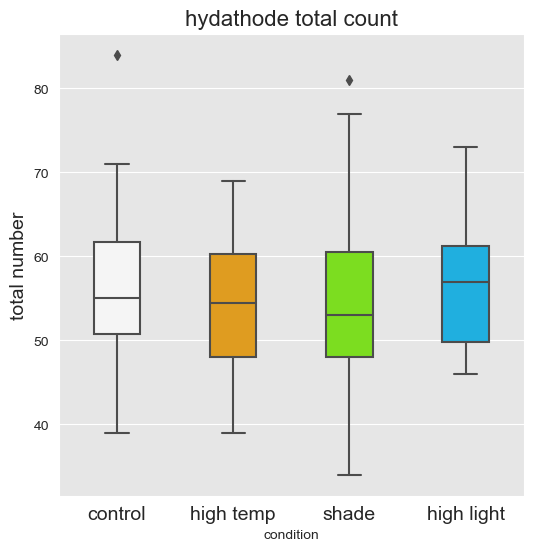

In [48]:
colors = ['whitesmoke', 'orange', 'lawngreen', 'deepskyblue']
order = ['natural', 'heat',  'shade', 'control']
x = "condition"
y = "hydatode_count"
sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(figsize = (6,6))

ax = sns.boxplot (x = x, y = y, data = info_df, order = order, width = .4)

ax.set_title('hydathode total count', fontsize = 16)


ax.set_ylabel('total number', fontsize = 14)

ax.set_xticklabels(['control','high temp','shade','high light'], fontsize = 14)


plt.show()

Very different testable counts:

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

natural v.s. heat: t-test paired samples with Bonferroni correction, P_val=3.628e-03 stat=3.622e+00
heat v.s. shade: t-test paired samples with Bonferroni correction, P_val=2.294e-04 stat=-4.836e+00


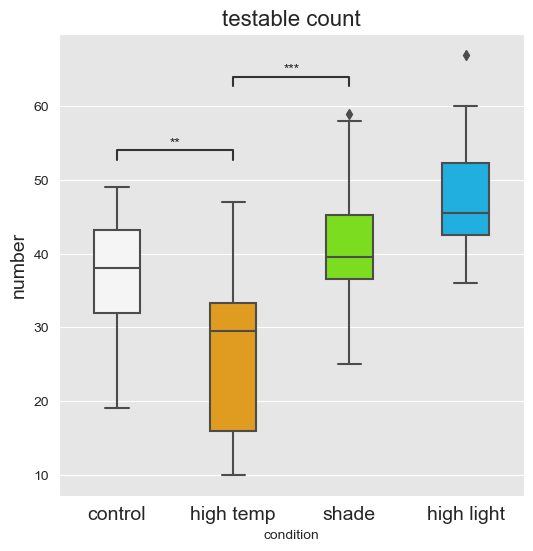

In [82]:
x = "condition"
y = "single_count"
sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(figsize = (6,6))

ax = sns.boxplot (x = x, y = y, data = info_df, order = order, width = .4)



ax, test_results = add_stat_annotation(ax, data = info_df, x=x, y=y, order = order,
                    box_pairs = [('natural', 'heat'), ('heat', 'shade')],
                    test='t-test_paired',  
                    text_format='star', 
                    loc='inside', 
                    verbose=2)
                    

ax.set_title('testable count', fontsize = 16)
ax.set_ylabel('number', fontsize = 14)
ax.set_xticklabels(['control','high temp','shade','high light'], fontsize = 14)


plt.show()

### Explore leaf size v.s. number of hydathodes:

- so most are negatively corelated: the larger the blade, the less number of total hydathodes.

In [51]:
length_dict = pd.read_csv('environmental/leaf_length.csv', index_col=0).to_dict()['petiole to tip']

In [52]:
length_df = pd.read_csv('environmental/leaf_length.csv')

In [71]:
control_length = control_info[['hydatode_count', 'single_count']]
control_length['length'] = ""
for sample in control_length.index:
    control_length['length'][sample] = float(length_dict[sample])

<ipython-input-71-d2e833a7973a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_length['length'] = ""
<ipython-input-71-d2e833a7973a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  control_length['length'][sample] = float(length_dict[sample])


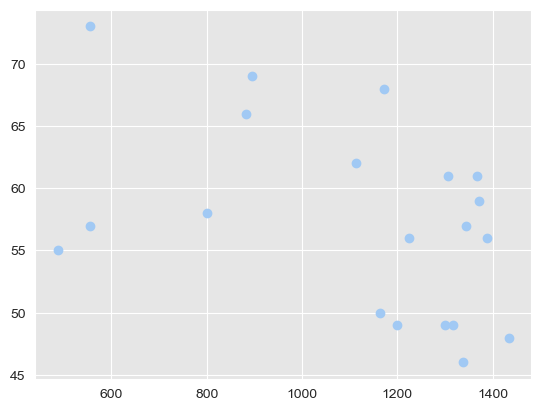

In [72]:
sns.set_palette("pastel")
plt.scatter(control_length['length'], control_length['hydatode_count'])
plt.show()

In [73]:
natural_length = natural_info[['hydatode_count', 'single_count']]
natural_length['length'] = ""
for sample in natural_length.index:
    if sample in length_dict.keys() and  length_dict[sample] != '/':
        natural_length['length'][sample] = float(length_dict[sample])
    else:
        natural_length = natural_length.drop(index = sample)

<ipython-input-73-d3b3fc584fb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  natural_length['length'] = ""
<ipython-input-73-d3b3fc584fb4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  natural_length['length'][sample] = float(length_dict[sample])
<ipython-input-73-d3b3fc584fb4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  natural_length['length'][sample] = float(length

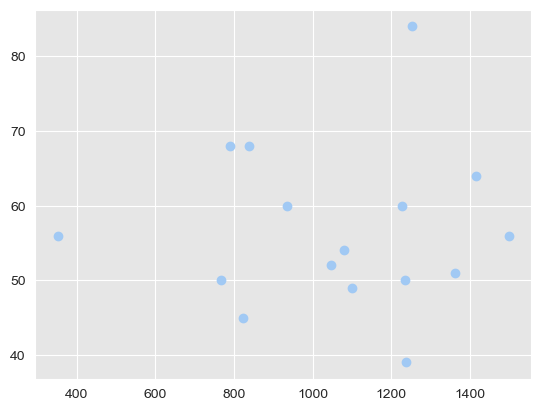

In [74]:
sns.set_palette("pastel")
plt.scatter(natural_length['length'], natural_length['hydatode_count'])
plt.show()

In [75]:
shade_length = shade_info[['hydatode_count', 'single_count']]
shade_length['length'] = ""
for sample in shade_length.index:
    if sample in length_dict.keys() and  length_dict[sample] != '/':
        shade_length['length'][sample] = float(length_dict[sample])
    else:
        shade_length = shade_length.drop(index = sample)

<ipython-input-75-96430e5f76bb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shade_length['length'] = ""
<ipython-input-75-96430e5f76bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shade_length['length'][sample] = float(length_dict[sample])
<ipython-input-75-96430e5f76bb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shade_length['length'][sample] = float(length_dict[

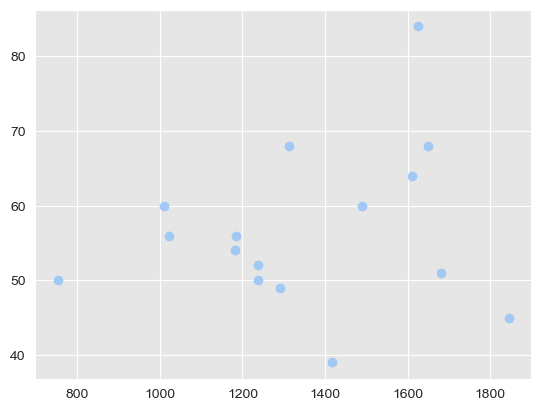

In [76]:
sns.set_palette("pastel")
plt.scatter(shade_length['length'], natural_length['hydatode_count'])
plt.show()

<ipython-input-77-b0a2c171d46a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heat_length['length'] = ""
<ipython-input-77-b0a2c171d46a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heat_length['length'][sample] = float(length_dict[sample])
<ipython-input-77-b0a2c171d46a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heat_length['length'][sample] = float(length_dict[sam

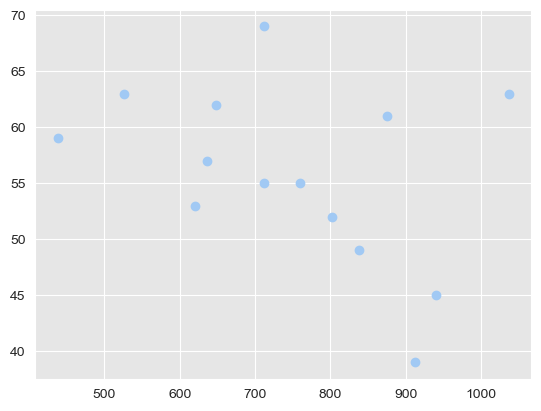

In [77]:
heat_length = heat_info[['hydatode_count', 'single_count']]
heat_length['length'] = ""
for sample in heat_length.index:
    if sample in length_dict.keys() and  length_dict[sample] != '/':
        heat_length['length'][sample] = float(length_dict[sample])
    else:
        heat_length = heat_length.drop(index = sample)
    
sns.set_palette("pastel")
plt.scatter(heat_length['length'], heat_length['hydatode_count'])
plt.show()